In [2]:
from osgeo import gdal
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
%matplotlib inline

In [3]:
img = r'D:\Projects\Pr\3317.20\Toeleveringen\peiling//SUR-5081-ATU-a-150903-NES-KR-MB-AJR-1x1.asc'
df = pd.read_csv(img, header=None, names=['X','Y','data'])
df['geometry'] = df.apply(lambda z: Point(z.X, z.Y), axis=1)
peiling = gp.GeoDataFrame(df, crs={'init': 'epsg:28992'}) # rd projection

In [4]:
peiling.iloc[::150, :].head()

,X,Y,data,geometry
0,180671.5,605156.5,-4.14,POINT (180671.5 605156.5)
150,180674.5,605152.5,-3.65,POINT (180674.5 605152.5)
300,180690.5,605158.5,-4.12,POINT (180690.5 605158.5)
450,180714.5,605160.5,-3.97,POINT (180714.5 605160.5)
600,180672.5,605163.5,-4.40,POINT (180672.5 605163.5)


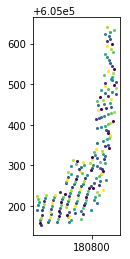

In [5]:
peiling.iloc[::150, :].plot()

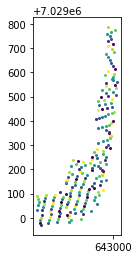

In [6]:
# test reprojection
peiling.iloc[::150, :].to_crs({'init':'epsg:3395'}).plot() 

In [7]:
peiling.envelope.head()

0    POINT (180671.5 605156.5)
1    POINT (180671.5 605157.5)
2    POINT (180671.5 605158.5)
3    POINT (180670.5 605159.5)
4    POINT (180671.5 605159.5)
dtype: object

In [8]:
peiling.to_csv(r'D:\Projects\Pr\3317.20\Toeleveringen\peiling//grid_2.csv')